# ORTHOGONAL POLYNOMIAL DENSITY ESTIMATION
## Preliminaries
### Cange working directory

In [1]:
cd PyCharm

/home/georg/Documents/Python/Unpublished/PyCharm


### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
from uuid import uuid4
from random import getrandbits

from opde.geometry import WidthOf, Window, PointAt, BoundingBox, Mapper
from opde.estimate import DensityEstimate
from opde.estimate.helpers import Event

### Notebook settings

In [3]:
%matplotlib notebook
sbn.set_style('white')

legend_params = {'loc': 'best',
                 'frameon': True, 
                 'fancybox': True, 
                 'framealpha': 0.7}

In [4]:
legendre_width = WidthOf(1.8)

center = PointAt(0, 0)
window = Window(4, 4)
bounds = BoundingBox(center, window)

mapper = Mapper(bounds, legendre_width)

density = DensityEstimate(20, 20, mapper)

In [5]:
point = PointAt(0.5, 0.5)
event = Event(uuid4(), True, point)

In [6]:
density.at(event.location)

0.25

In [7]:
density.update_with(event)

In [8]:
density._phi

,5ebe667b-a6f0-46db-83d9-0b93033f21d6
0,0.500000
1,0.194856
2,-0.474116
3,-0.408800
4,0.294553
5,0.541851
6,-0.052023
7,-0.565703
8,-0.202015
9,0.475170


In [39]:
def new_event():
    location = np.random.uniform(low=-2, high=2, size=2)
    point = PointAt(*location)
    return Event(uuid4(), True, point)

def event():
    add = bool(getrandbits(1))
    if add:
        location = np.random.uniform(low=-2, high=2, size=2)
        point = PointAt(*location)
        return Event(uuid4(), True, point)
    column = density._phi.sample(1, axis=1).columns.values[0]
    return Event(column, False)

In [40]:
%%time
for i in range(1000):
    density.update_with(new_event())

CPU times: user 24min 22s, sys: 49.8 s, total: 25min 12s
Wall time: 2min 9s


In [41]:
%%time
for i in range(1000):
    density.update_with(event())
print(density._phi.shape)

(441, 1003)
CPU times: user 40min 9s, sys: 1min 5s, total: 41min 15s
Wall time: 3min 27s


In [ ]:
%%time
for i in range(1000):
    density.at(new_event().location)

__Timings__

144 ms pro additive update

200 ms pro random update

0.5 ms pro ausrechnen

In [44]:
x_grid = np.linspace(-0.9, 0.90, 50)
y_grid = np.linspace(-0.9, 0.90, 50)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)

<IPython.core.display.Javascript object>


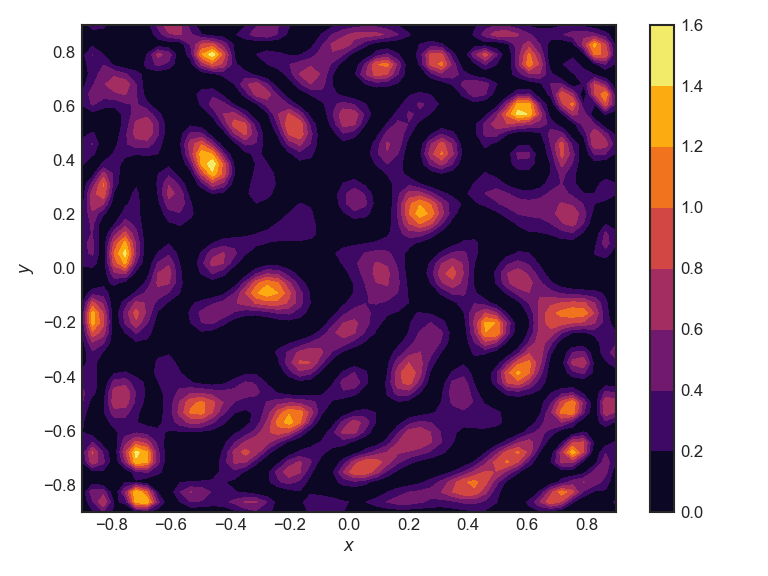

In [45]:
#for i in range(10):
#    density.update_with(new_event())

p_hat = density._on(x_grid.ravel(), y_grid.ravel())

fig, ax = plt.subplots()
ax.set(xlabel=r'$x$', ylabel=r'$y$')
contour = ax.contourf(x_grid, y_grid, p_hat, 9, cmap='inferno')
cbar = plt.colorbar(contour, ax=ax)
fig.tight_layout()

In [ ]:
density._c.dot(density._c)

In [ ]:
4.2/100

In [42]:
(3*60+27)/1000

0.207

In [ ]:
bool(getrandbits(1))

In [ ]:
density._phi.sample(1, axis=1).columns.values[0]